In [11]:
import pandas as pd
import gpxo
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import warnings
import datetime
from tcxreader.tcxreader import TCXReader, TCXExercise
import tcxparser

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore')


In [22]:
# Caminho da pasta que terá iteração nos seus arquivos
folder_path = 'C:/Users/USER/Desktop/EstudosDados/Projetos/Corrida/physical_inactivity_prediction/scripts_drift/tests_and_preprocessing/athlete6_tcx' 

### Conferindo se algum arquivo está com problema de leitura

In [23]:

# Contador de linhas para servir de index
error_count = 0

# Itera por cada arquivo na pasta
for filename in os.listdir(folder_path):
    # Junta o nome do arquivo com o caminho da pasta
    full_path = os.path.join(folder_path, filename)    
    
    try:
        
        tcx_reader = TCXReader()
        data: TCXExercise = tcx_reader.read(full_path)
        data.start_time.date()

    except:

        # Printa o index e o nome do arquivo que ocorreu algum erro na leitura
        print(f"An error ocurred on {filename}")
    
        # Acréscimo no contador para reiniciar o loop
        error_count +=1
print(error_count)


An error ocurred on 10200151431.tcx
An error ocurred on 10206600795.tcx
An error ocurred on 10214037485.tcx
An error ocurred on 10214334699.tcx
An error ocurred on 10266648147.tcx
An error ocurred on 10273274134.tcx
An error ocurred on 10341533745.tcx
An error ocurred on 10341533784.tcx
An error ocurred on 10348272808.tcx
An error ocurred on 10362592099.tcx
An error ocurred on 10378681091.tcx
An error ocurred on 10390209367.tcx
An error ocurred on 10397154175.tcx
An error ocurred on 10411633701.tcx
An error ocurred on 10437961665.tcx
An error ocurred on 10444074661.tcx
An error ocurred on 10458087648.tcx
An error ocurred on 10467992399.tcx
An error ocurred on 10485238756.tcx
An error ocurred on 10492401190.tcx
An error ocurred on 10509892234.tcx
An error ocurred on 10514017420.tcx
An error ocurred on 10538235369.tcx
An error ocurred on 10555213200.tcx
An error ocurred on 10564808117.tcx
An error ocurred on 10584262101.tcx
An error ocurred on 10595498898.tcx
An error ocurred on 10602133

In [24]:
# Dicionário com as features que serão criadas com o valor de cada atividade
df_athlete_dict = {
    'activity_date': [],
    'total_distance (km)': [], 
    'total_time (min)': [],
    'pace (min/km)': [],
    'velocity (km/h)': []    
}

# Itera por cada arquivo na pasta
for filename in os.listdir(folder_path):
    # Junta o nome do arquivo com o caminho da pasta
    full_path = os.path.join(folder_path, filename)
    
    try:
        
        tcx_reader = TCXReader()
        data: TCXExercise = tcx_reader.read(full_path)

        # Data da atividade (a partir da primeira linha do df original com os pontos marcados)
        df_athlete_dict['activity_date'].append(pd.Timestamp(data.start_time.date()))

        # Distância total em km
        total_dist = data.distance / 1000
        df_athlete_dict['total_distance (km)'].append(round(total_dist,2))

        # Tempo total em minutos
        total_min = (data.end_time - data.start_time).total_seconds() // 60
        df_athlete_dict['total_time (min)'].append(total_min)

        # Ritmo geral da atividade
        if total_dist == 0:
            df_athlete_dict['pace (min/km)'].append(0)
        else:
            df_athlete_dict['pace (min/km)'].append(round(total_min / total_dist, 2))

        # Velocidade em km/h
        df_athlete_dict['velocity (km/h)'].append(round(data.avg_speed,2))

        print('tcxreader')
    except:
    
        tcx_parser = tcxparser.TCXParser(full_path)

        ''' Cocantenação dos elementos novos no df a cada iteração '''

        # Data da atividade (a partir da primeira linha do df original com os pontos marcados)
        df_athlete_dict['activity_date'].append(pd.Timestamp(tcx_parser.started_at).tz_convert('America/Sao_Paulo').tz_localize(None).normalize())

        # Distância total em km
        total_dist = tcx_parser.distance / 1000
        df_athlete_dict['total_distance (km)'].append(round(total_dist, 2))

        # Tempo total em minutos
        try:
            total_min = tcx_parser.duration // 60

        # Exceção caso não haja no arquivo tcx "<TotalTimeSeconds>"
        except:
            total_min = (pd.Timestamp(tcx_parser.completed_at) - pd.Timestamp(tcx_parser.started_at)).total_seconds() // 60

        df_athlete_dict['total_time (min)'].append(total_min)

        # Ritmo geral da atividade
        if total_dist == 0:
            df_athlete_dict['pace (min/km)'].append(0)
        else:
            df_athlete_dict['pace (min/km)'].append(round(total_min / total_dist, 2))

        # Velocidade em km/h
        df_athlete_dict['velocity (km/h)'].append(round(total_dist / (total_min/60),2))
        print('tcxparser')

tcxparser
tcxparser
tcxparser
tcxparser
tcxreader
tcxreader
tcxparser
tcxparser
tcxreader
tcxreader
tcxreader
tcxreader
tcxreader
tcxparser
tcxparser
tcxparser
tcxparser
tcxparser
tcxreader
tcxparser
tcxparser
tcxparser
tcxreader
tcxreader
tcxparser
tcxparser
tcxparser
tcxparser
tcxreader
tcxreader
tcxreader
tcxparser
tcxparser
tcxparser
tcxreader
tcxparser
tcxreader
tcxparser
tcxparser
tcxparser
tcxreader
tcxparser
tcxparser
tcxparser
tcxreader
tcxreader
tcxparser
tcxreader
tcxparser
tcxreader
tcxparser
tcxreader
tcxreader
tcxparser
tcxparser
tcxparser
tcxparser
tcxparser
tcxparser
tcxreader
tcxparser
tcxparser
tcxparser
tcxreader
tcxparser
tcxparser
tcxparser
tcxreader
tcxparser
tcxparser
tcxparser
tcxreader
tcxreader
tcxparser
tcxparser
tcxparser
tcxparser
tcxparser
tcxparser
tcxparser
tcxparser
tcxparser
tcxparser
tcxreader
tcxparser
tcxparser
tcxparser
tcxparser
tcxparser
tcxparser


In [15]:
# Passando o dicionário com as features criadas para um Dataframe
df_athlete_activities = pd.DataFrame(df_athlete_dict)
df_athlete_activities

,activity_date,total_distance (km),total_time (min),pace (min/km),velocity (km/h)
0,2024-03-22,4.81,25.0,5.20,11.53
1,2024-03-26,0.00,25.0,0.00,0.00
2,2024-03-27,0.00,17.0,0.00,0.00
3,2024-03-27,5.05,24.0,4.75,12.39
4,2024-03-28,0.00,18.0,0.00,0.00
5,2024-03-29,8.02,41.0,5.11,11.46
6,2024-04-03,3.35,23.0,6.87,8.41
7,2024-04-04,3.24,14.0,4.32,13.28
8,2024-04-04,3.02,14.0,4.64,12.44
9,2024-04-05,5.02,24.0,4.78,12.16


In [152]:
# Removendo datas duplicadas relacionadas à 2 ou mais atividades no mesmo dia
df_athlete_activities.drop_duplicates(subset='activity_date', inplace= True)

In [153]:
# Atribuindo tipo de atividade para 'Atividade'
df_athlete_activities.insert(2, 'activity_type', 'Atividade')

In [154]:
# Ordenando a data da menor pra maior e resetando index
df_athlete_activities.sort_values('activity_date', ascending=True, inplace=True)
df_athlete_activities.reset_index(drop=True, inplace= True)

In [155]:
# Fazendo a diferença entre a atividade seguinte e a anterior e preenchendo a primeira linha com 0
df_athlete_activities['days_between_activities'] = df_athlete_activities['activity_date'].diff(periods=1).fillna(datetime.timedelta(days=1))

# Alterando o tipo da coluna para int
df_athlete_activities['days_between_activities'] = (df_athlete_activities['days_between_activities'].dt.days) - 1

In [156]:
# Data da primeira atividade
start = df_athlete_activities['activity_date'].iloc[0]

# Data da última atividade
end = df_athlete_activities['activity_date'].iloc[-1]

# Dias entre a primeira e última atividade
dates = pd.date_range(start,end,freq='d')

# Colocando todas as datas em um df
df_dates = pd.DataFrame({'activity_date': dates})
df_dates

,activity_date
0,2024-03-22
1,2024-03-23
2,2024-03-24
3,2024-03-25
4,2024-03-26
...,...
84,2024-06-14
85,2024-06-15
86,2024-06-16
87,2024-06-17


In [157]:
df_athlete_activities

,activity_date,total_distance (km),activity_type,total_time (min),pace (min/km),velocity (km/h),days_between_activities
0,2024-03-22,4.81,Atividade,25.0,5.20,11.53,0
1,2024-03-26,0.00,Atividade,25.0,0.00,0.00,3
2,2024-03-27,0.00,Atividade,17.0,0.00,0.00,0
3,2024-03-28,0.00,Atividade,18.0,0.00,0.00,0
4,2024-03-29,8.02,Atividade,41.0,5.11,11.46,0
5,2024-04-03,3.35,Atividade,23.0,6.87,8.41,4
6,2024-04-04,3.24,Atividade,14.0,4.32,13.28,0
7,2024-04-05,5.02,Atividade,24.0,4.78,12.16,0
8,2024-04-12,5.68,Atividade,29.0,5.11,11.40,6
9,2024-04-14,9.77,Atividade,48.0,4.91,12.15,1


In [158]:
# Right join pra poder manter os dados das atividades existentes mas adicionar linhas para os novos dias
df_athlete_activities = df_dates.merge(df_athlete_activities, on='activity_date', how='left')

# Preechendo os valores nulos como Dia sem atividade
df_athlete_activities['activity_type'].fillna('Dia sem atividade', inplace=True)

In [159]:
# Preenchendo os valores NaN com 1 para poder fazer uma subtração cumulativa
df_athlete_activities['days_between_activities'].fillna(-1, inplace= True)

# Fazendo cumsum com valores negativos e depois multiplicando por -1 pra transformá-los em positivos
df_athlete_activities['days_between_activities'] = df_athlete_activities['days_between_activities'].cumsum() * -1

# Transformando em int pra evitar -0 ao invés de 0
df_athlete_activities['days_between_activities'] = df_athlete_activities['days_between_activities'].astype(int)

In [160]:
df_athlete_activities

,activity_date,total_distance (km),activity_type,total_time (min),pace (min/km),velocity (km/h),days_between_activities
0,2024-03-22,4.81,Atividade,25.0,5.20,11.53,0
1,2024-03-23,NaN,Dia sem atividade,NaN,NaN,NaN,1
2,2024-03-24,NaN,Dia sem atividade,NaN,NaN,NaN,2
3,2024-03-25,NaN,Dia sem atividade,NaN,NaN,NaN,3
4,2024-03-26,0.00,Atividade,25.0,0.00,0.00,0
...,...,...,...,...,...,...,...
84,2024-06-14,NaN,Dia sem atividade,NaN,NaN,NaN,3
85,2024-06-15,NaN,Dia sem atividade,NaN,NaN,NaN,4
86,2024-06-16,10.06,Atividade,45.0,4.47,13.26,0
87,2024-06-17,NaN,Dia sem atividade,NaN,NaN,NaN,1


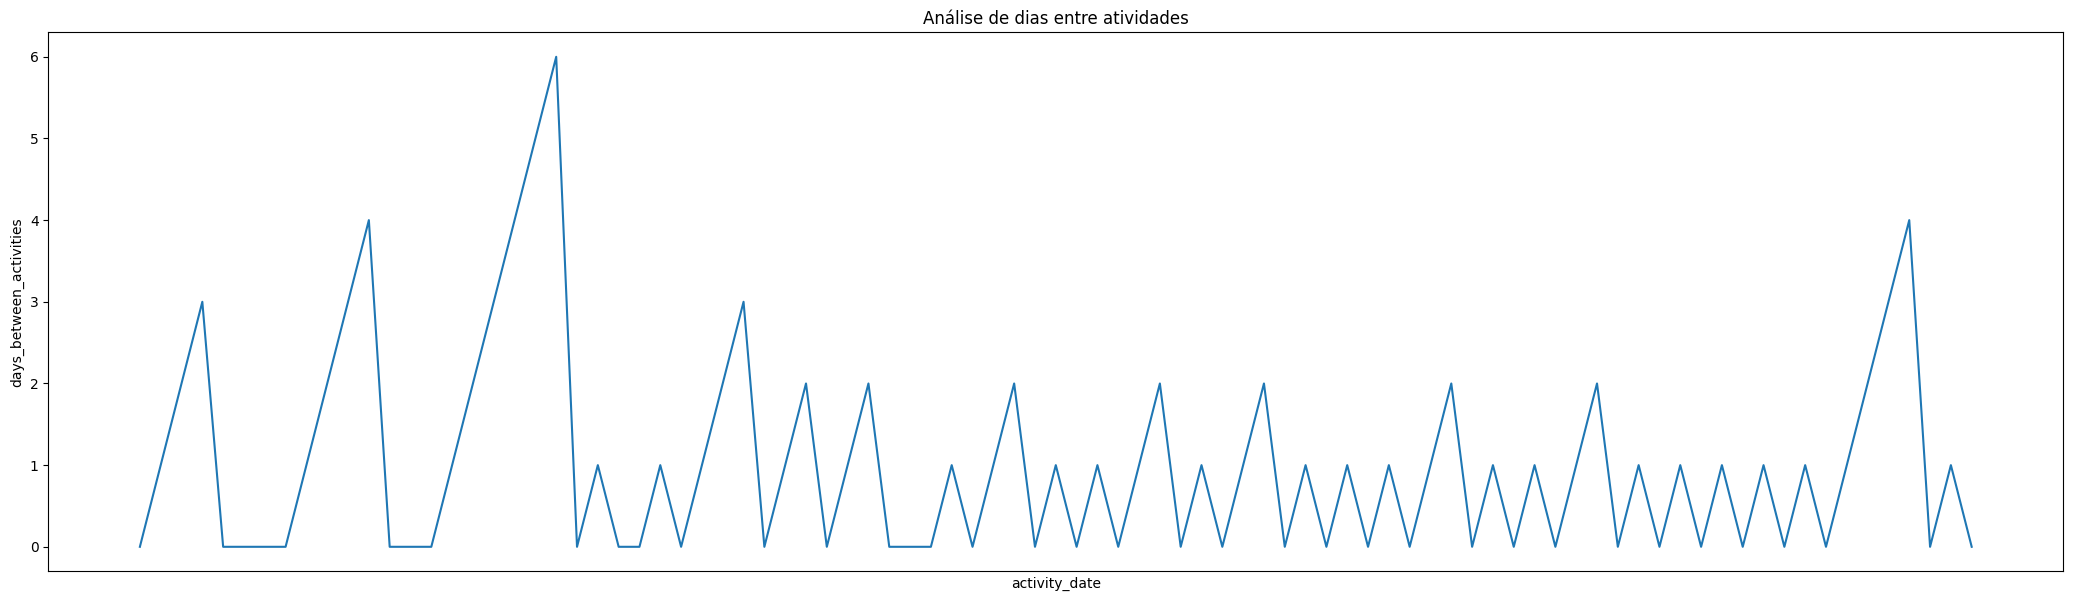

In [161]:
fig, ax = plt.subplots(figsize =(26, 7))
sns.lineplot(x = 'activity_date', y= 'days_between_activities', data= df_athlete_activities)
plt.xticks([])
plt.title('Análise de dias entre atividades')
plt.show()